# Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import matplotlib.pyplot as plt


In [2]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [3]:
#models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [4]:
#import kmeans
from sklearn.cluster import KMeans

In [5]:
# ROC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [6]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score


In [7]:
df = pd.read_csv("Train.csv")
df.shape

(10999, 12)

In [8]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
data=df.copy()

In [12]:
data.drop('ID', axis = 1, inplace = True)


In [13]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

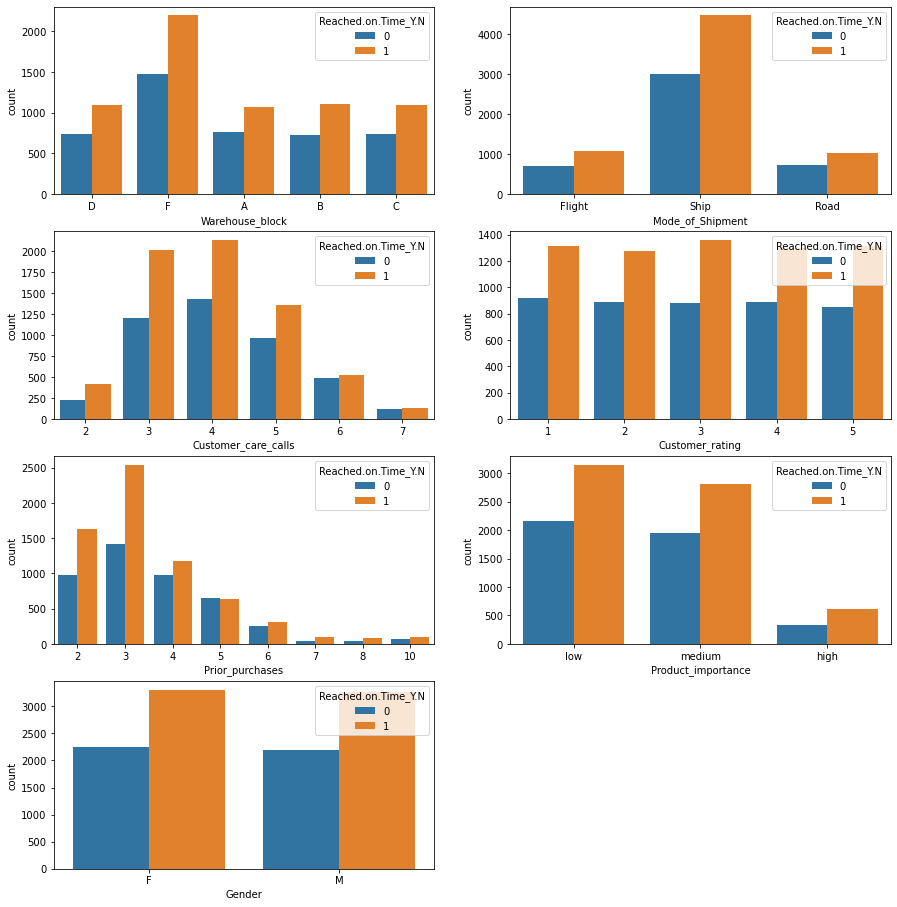

In [15]:
# Explore the relation between Reached on time and other attributes
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = data, ax=ax)
    plotnumber += 1
plt.show()

# Outliers Handling

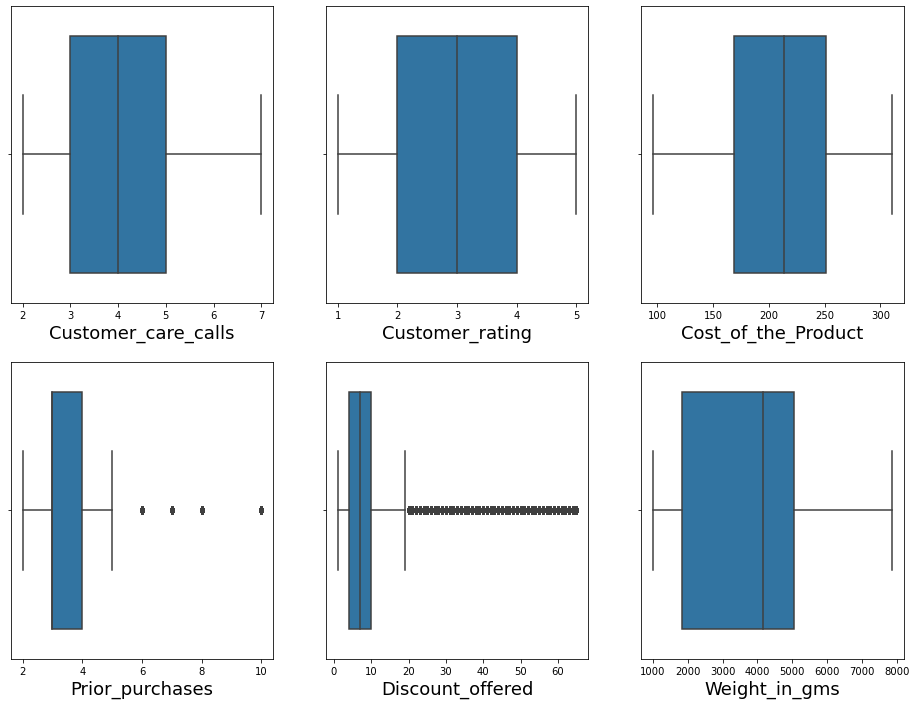

In [16]:
dfnum = df.drop(columns = ['ID','Warehouse_block', 'Mode_of_Shipment',
                                  'Product_importance', 'Gender',
                                  'Reached.on.Time_Y.N'])
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(16, 12)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    boxdetails = sns.boxplot(x = dfnum[variable], ax=subplot) 
    boxdetails.set_xlabel(variable, fontsize = 18)
    
plt.show()
#df_num=data.select_dtypes(include=[np.number])

In [17]:
q1 = df['Discount_offered'].quantile(0.25)
q3 = df['Discount_offered'].quantile(0.75)
IQR = q3-q1

In [18]:
upper_limit = q3 + 1.5*IQR
df.loc[df['Discount_offered'] > upper_limit, 'Discount_offered'] = upper_limit

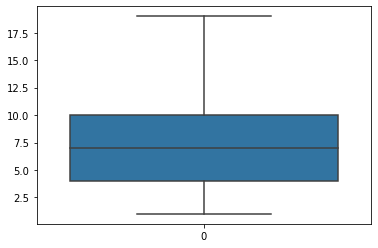

In [19]:
sns.boxplot(data = df['Discount_offered'])
plt.show()

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

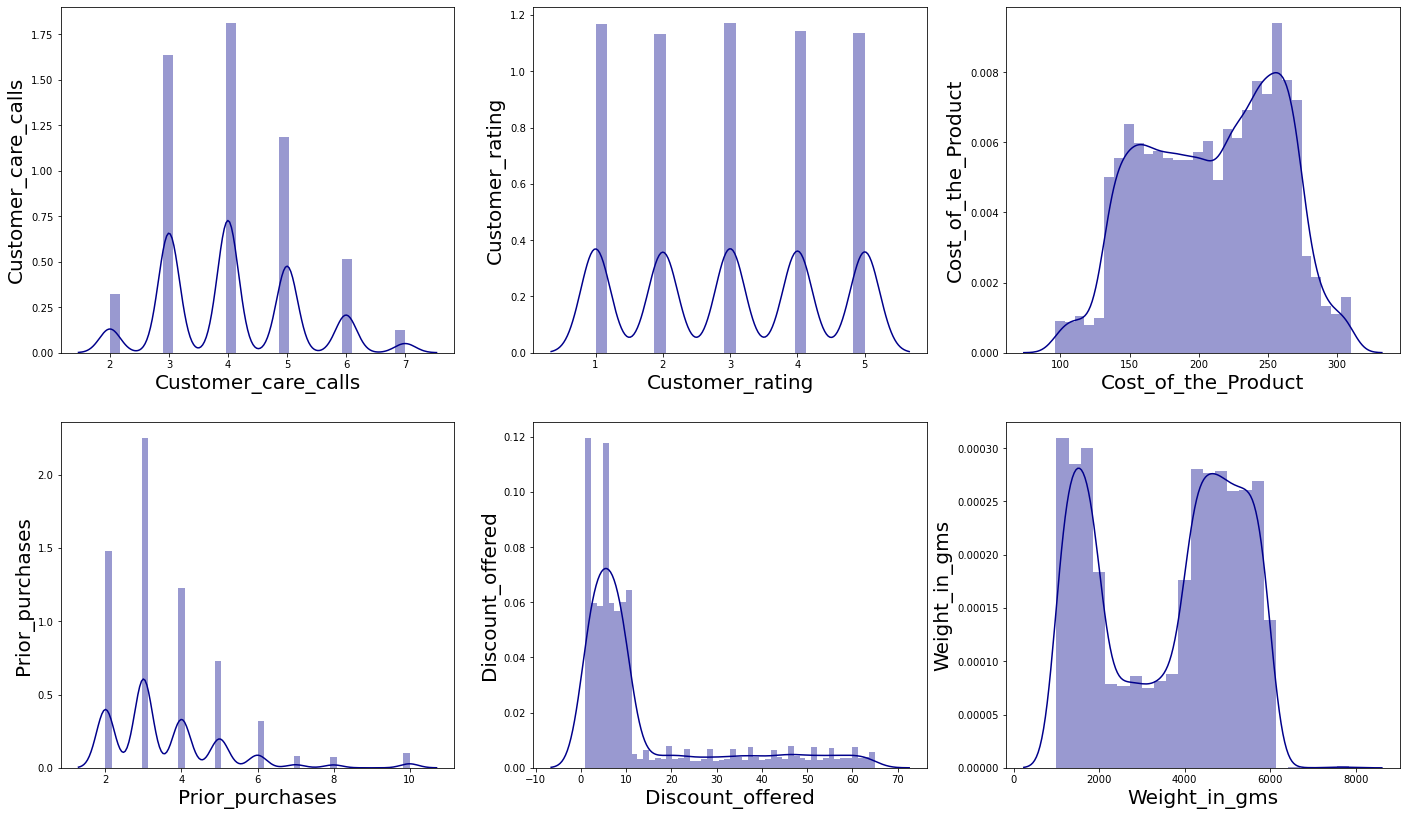

In [20]:
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(24,14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    distdetails = sns.distplot(x = dfnum[variable], color = 'darkblue', ax=subplot,) 
    distdetails.set_xlabel(variable, fontsize = 20)
    distdetails.set_ylabel(variable, fontsize = 20)
    
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Mode_of_Shipment'] = encoder.fit_transform(data['Mode_of_Shipment'])
data['Product_importance'] = encoder.fit_transform(data['Product_importance'])
data['Warehouse_block'] = encoder.fit_transform(data['Warehouse_block'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


# Features Correlation (Positive or Negative)



<AxesSubplot:>

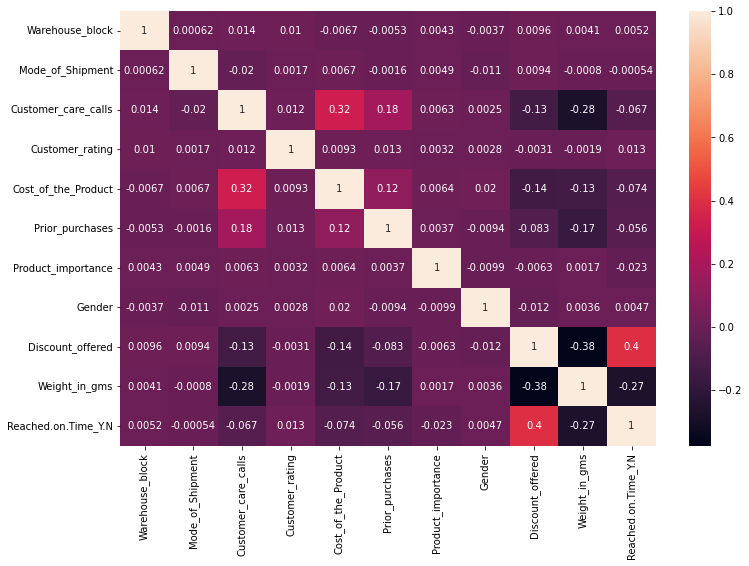

In [22]:
# present the correlation in clear way by showing the positive or negative correlation between attributes
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(),  annot = True)

# Features Scaling


In [23]:
# Scaling each feature to a given range
# MinMaxScaler subtracts the minimum value in the feature and then divides by the range.
# The range is the difference between the original maximum and original minimum.
scaler = MinMaxScaler()
scaler.fit(data.drop('Reached.on.Time_Y.N',axis=1))
scaled_features = scaler.transform(data.drop('Reached.on.Time_Y.N',axis=1))
dataScale = pd.DataFrame(scaled_features,columns=data.columns[:-1])
dataScale.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.75,0.0,0.4,0.25,0.378505,0.125,0.5,0.0,0.671875,0.033893
1,1.00,0.0,0.4,1.00,0.560748,0.000,0.5,1.0,0.906250,0.304894
2,0.00,0.0,0.0,0.25,0.406542,0.250,0.5,1.0,0.734375,0.346676
3,0.25,0.0,0.2,0.50,0.373832,0.250,1.0,1.0,0.140625,0.025712
4,0.50,0.0,0.0,0.25,0.411215,0.125,1.0,0.0,0.703125,0.216654


In [24]:
 def PlotRoc():
    plt.figure()
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Unsupervised Learning

In [25]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()
scaler.fit(df[['Discount_offered']])
df['Discount_offered'] = scaler.transform(df[['Discount_offered']])
scaler.fit(df[['Cost_of_the_Product']])
df['Cost_of_the_Product'] = scaler.transform(df[['Cost_of_the_Product']])
df[['Cost_of_the_Product','Discount_offered']].head()

,Cost_of_the_Product,Discount_offered
0,0.378505,1.0
1,0.560748,1.0
2,0.406542,1.0
3,0.373832,0.5
4,0.411215,1.0


1- Kmeans Clustering with K=2



In [26]:
km = KMeans(n_clusters=2,random_state=42) #n_initint, default=10
y_predicted = km.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
km.cluster_centers_

array([[0.55438929, 0.25348252],
       [0.46547551, 0.97406109]])

In [28]:
df['cluster']=y_predicted
df[['Cost_of_the_Product','Discount_offered','cluster']].head()

,Cost_of_the_Product,Discount_offered,cluster
0,0.378505,1.0,1
1,0.560748,1.0,1
2,0.406542,1.0,1
3,0.373832,0.5,0
4,0.411215,1.0,1


Inertia of Kmeans with 2 Clusters:  778.3247436724189


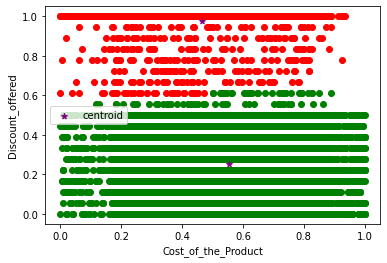

In [29]:
#Visualize Kmeans with 2 clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 2 Clusters: ", km.inertia_)

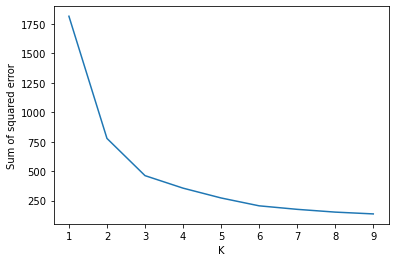

In [30]:
#Elbow Method

#Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE)
#between data points and their assigned clusters’ centroids. 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['Cost_of_the_Product','Discount_offered']])
    sse.append(km2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The graph above shows that k=3 is not a bad choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

That is why we will try K=3 in the coming analysis and check the results.

Inertia of Kmeans with 3 Clusters:  462.2968436984273


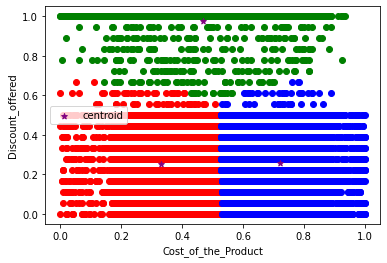

In [31]:
#Kmeans with K= 3 
km3 = KMeans(n_clusters=3,random_state=42)
y_predicted = km3.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='Blue')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 3 Clusters: ", km3.inertia_)

In [32]:
df['Cost_of_the_Product'].shape

(10999,)

In [33]:
y_predicted.shape

(10999,)

In [34]:
homogeneity_score(df['Cost_of_the_Product'],y_predicted)

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.10673791589138258

In [35]:
completeness_score(df['Cost_of_the_Product'],y_predicted)

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.5183662098362855

# Supervised Analysis

# 1- Naive Buyes

In [36]:
# run the naive Bayes on data to predict the reached on time
#x= data.drop('Reached.on.Time_Y.N', axis=1)
import sklearn.metrics as metrics

x=dataScale
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6563636363636364


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.98      0.43      0.60      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.80      0.66      0.64      2200



C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


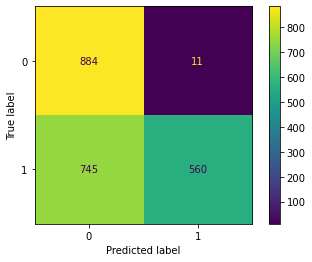

In [38]:

confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)


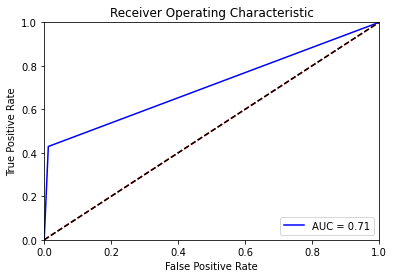

In [39]:
PlotRoc()